# GROUP ASSIGNMENT - RMBA-2771 Fall 2025

Date: 23.09.2025 

Course: 2771 Research Methods for Business Analytics 

Instructor: Daniel Obermeier

Group: TXB B18

Henrik Peuker 72636

### Table of content

Select the hyperling to go to the respective section

- [1 Executive Summary](#1-executive-summary)
- [2 Introduction](#2-introduction)
- [3 Exploratory Analyis](#3-exploratory-analysis)
- [4 Method 1](#4-method-1)
- [5 Method 2](#5-method-2)
  - [5.1 Creating the model](#51-creating-the-model)
  - [5.2 Interpreting the outcome](#52-interpreting-the-outcome)
    - [5.2.1 Goodness-of-fit](#521-goodness-of-fit)
    - [5.2.2 Hypothesis testing](#522-hypothesis-testing)
    - [5.2.3 Odds ration](#523-odds-ratio)
- [6 Reflection on the use of AI](#6-reflection-on-the-use-of-ai)
- [7 Conclusion](#7-conclusion)


# 1. Executive Summary

# 2. Introduction

The data set "HR-Employee-Attrition" includes individual records of employees. Each row represents an individual employee, while the columns capture several demographic, educational, job-related and performance-related attributes. One of the main variables is Attrition, which shos if an employee has left the company. Attrition is recorded as a binary variable. 
The dataset includes variables such as age, gender, marital status, education level, job satisfaction, income. There is a mix of categorical, ordinal and numeric types which allows for a detailed analysis. 

When looking at the data set we have identified a novel, relevant and interesting research question regarding attrition  

The following research question serves as a guiding question for the analysis. To what extent do business travel frequency, distance from home, and income influence voluntary employee attrition?





To what extend do different job characteristics affect voluntary attrition? 

Research question: Which factors most strongly influnce voluntary employee attrition across different job characteristics?

H1: 
Greater business travel frequency is associated with higher odds of voluntary employee attrition, controlling for role, satisfaction and income.


Test: Chi-Square Tests or Logistic Regression

H2: Lower monthly income increase the odds of attrition, after adjusting for job level, performance, and satisfaction. 

H2: Higher income is negatively associated with voluntary employee attrition?

Further ideas: 
H2: The relationship between business travel and voluntary attrition is stronger among married couples than singles.
Test: Chi-Square  or Logistic Regression


How do distance from home, income etc affect voluntary attrition? 


 


Research Question: Does promotion stagnation increase attrition, and is this effect affected by age?

H1: More years since last promotion are associated with higher attrition risk. 
H2: 
H3;:

# 3. Exploratory Analysis

In [1]:
%pip install statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.formula.api as smf
import seaborn as sns
from scipy.stats import skew 
from scipy.stats import kurtosis 

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing the data set and assigning it to the varible df 
df= pd.read_csv("HR-Employee-Attrition.csv")

In [3]:
# Creating a summary table to see the number of variable and the types to come up with a research question and get an overview of the data. 
summary_df = pd.DataFrame({
    "Variable": df.columns,
    "Type": [df[col].dtype.name for col in df.columns],
})

# Showing the summary, int64 are numerical values, whereas objects are categorical or binary values. We can indentify a diverse set of variables, including nominal(e.g. JobRole), ordinal(e.g. JobSatisfaction) and binary (e.g. attrition) variables.
print(summary_df)


                    Variable    Type
0                        Age   int64
1                  Attrition  object
2             BusinessTravel  object
3                  DailyRate   int64
4                 Department  object
5           DistanceFromHome   int64
6                  Education   int64
7             EducationField  object
8              EmployeeCount   int64
9             EmployeeNumber   int64
10   EnvironmentSatisfaction   int64
11                    Gender  object
12                HourlyRate   int64
13            JobInvolvement   int64
14                  JobLevel   int64
15                   JobRole  object
16           JobSatisfaction   int64
17             MaritalStatus  object
18             MonthlyIncome   int64
19               MonthlyRate   int64
20        NumCompaniesWorked   int64
21                    Over18  object
22                  OverTime  object
23         PercentSalaryHike   int64
24         PerformanceRating   int64
25  RelationshipSatisfaction   int64
2

In [4]:
#Looking at the first 20 rows to get a better understading of the data and detect some patterns and anomalies. 
pd.set_option('display.max_columns', None)
print(df.head(20))

    Age Attrition     BusinessTravel  DailyRate              Department  \
0    41       Yes      Travel_Rarely       1102                   Sales   
1    49        No  Travel_Frequently        279  Research & Development   
2    37       Yes      Travel_Rarely       1373  Research & Development   
3    33        No  Travel_Frequently       1392  Research & Development   
4    27        No      Travel_Rarely        591  Research & Development   
5    32        No  Travel_Frequently       1005  Research & Development   
6    59        No      Travel_Rarely       1324  Research & Development   
7    30        No      Travel_Rarely       1358  Research & Development   
8    38        No  Travel_Frequently        216  Research & Development   
9    36        No      Travel_Rarely       1299  Research & Development   
10   35        No      Travel_Rarely        809  Research & Development   
11   29        No      Travel_Rarely        153  Research & Development   
12   31        No      Tr

In [5]:
# Count unique values for the specified columns because we identified columns that are constant and therefore irrelevant for the analysis.
print("StandardHours value counts:")
print(df["StandardHours"].value_counts())

print("\nOver18 value counts:")
print(df["Over18"].value_counts())

print("\nEmployeeCount value counts:")
print(df["EmployeeCount"].value_counts())

# Drop the columns due to the described reasons.
df.drop(columns=["StandardHours", "Over18", "EmployeeCount"], inplace=True)


StandardHours value counts:
StandardHours
80    1470
Name: count, dtype: int64

Over18 value counts:
Over18
Y    1470
Name: count, dtype: int64

EmployeeCount value counts:
EmployeeCount
1    1470
Name: count, dtype: int64


In [6]:
# Checking for duplicates and missing values to ensure data quality. 
df.drop_duplicates(inplace=True)
print("After dropping duplicates:", df.shape)

print("Missing per column:\n", df.isnull().sum())

# Fill missing values
#    - For text (object) columns → “Unknown”
#    - For numeric columns → 0
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna("Unknown", inplace=True)
    else:
        df[col].fillna(0, inplace=True)

After dropping duplicates: (1470, 32)
Missing per column:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCu

In [7]:
# Computing the absolute and relative frequency of the target variable Attrition.
abs_freq = df['Attrition'].value_counts()

print(abs_freq)

rel_freq = df['Attrition'].value_counts(normalize=True)*100
print(rel_freq)

Attrition
No     1233
Yes     237
Name: count, dtype: int64
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


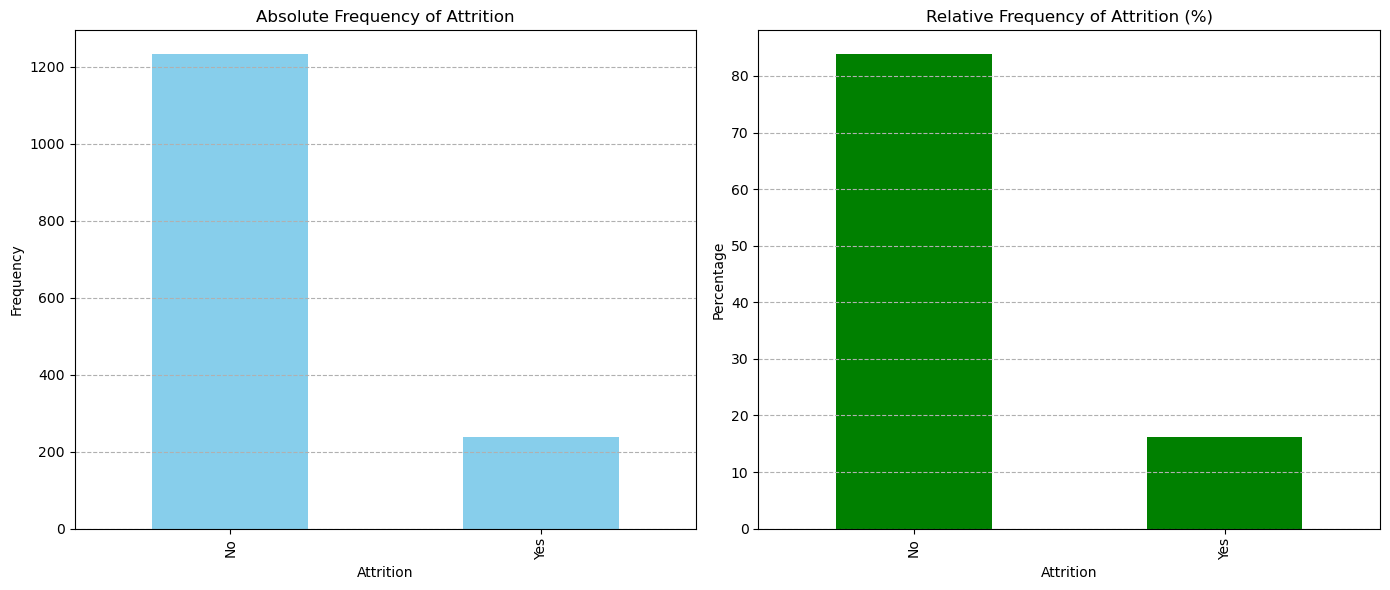

In [8]:
# Plotting the absolute and relative frequency of the variable Attrition as bar plots. The reason for this is that bar plots are easy to interpret. 
def plot_attrition_distribution(variable, title):
    abs_freq = df['Attrition'].value_counts()
    rel_freq = df['Attrition'].value_counts(normalize=True) * 100

    plt.figure(figsize=(14, 6))
    
    # Absolute frequency bar plot
    plt.subplot(1, 2, 1)
    abs_freq.plot(kind='bar', color='skyblue')
    plt.title(f'Absolute Frequency of {title}')
    plt.xlabel(title)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--')

    # Relative frequency bar plot
    plt.subplot(1, 2, 2)
    rel_freq.plot(kind='bar', color='green')
    plt.title(f'Relative Frequency of {title} (%)')
    plt.xlabel(title)
    plt.ylabel('Percentage')
    plt.grid(axis='y', linestyle='--')

    plt.tight_layout()
    plt.show()


plot_attrition_distribution('Attrition', 'Attrition')

In [9]:
#Encoding the variable Attrition into a binary variable 0 and 1 to be able to use it in statistical analysis.
df['attrition_binary'] = df['Attrition'].map({'No': 0, 'Yes': 1})


# Creating a new column 'BusinessTravel_Group' with 'High' and 'Low' categories to analyse its effects.
df['BusinessTravel_Group'] = df['BusinessTravel'].map({
    'Travel_Frequently': 'High',
    'Travel_Rarely': 'Low',
    'Non-Travel': 'Low'
})
print(df['BusinessTravel_Group'].value_counts())

BusinessTravel_Group
Low     1193
High     277
Name: count, dtype: int64


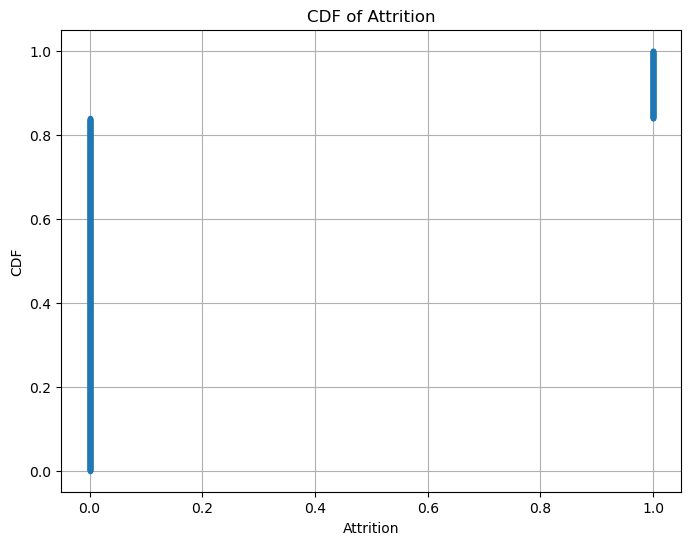

In [10]:
# Creating a cumulative distribution plot for the variable Attrition to understand the distribution of the variable.

# Assuming df['attrition_binary'] exists and is numeric
attrition_sorted = np.sort(df['attrition_binary'])
attrition_cdf = np.arange(1, len(attrition_sorted) + 1) / len(attrition_sorted)

plt.figure(figsize=(8, 6))
plt.plot(attrition_sorted, attrition_cdf, marker='.', linestyle='none')
plt.title('CDF of Attrition')
plt.xlabel('Attrition')
plt.ylabel('CDF')
plt.grid(True)
plt.show()



#### Histogram vs. kernel density plot

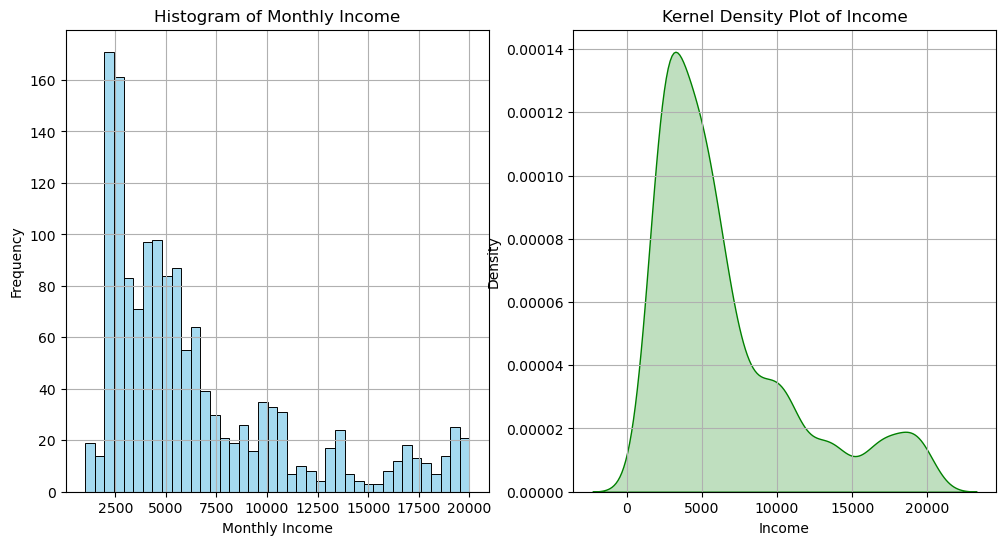

In [11]:
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['MonthlyIncome'], bins=40, kde=False, color='skyblue')
plt.title('Histogram of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.kdeplot(df['MonthlyIncome'], fill=True, color='green')
plt.title('Kernel Density Plot of Income')
plt.xlabel('Income')
plt.ylabel('Density')
plt.grid(True)

### XXX Measures of central tendency

In [12]:
min_income = df['MonthlyIncome'].min()
max_income = df['MonthlyIncome'].max()
range_income = max_income - min_income

print("Income:")
print(f"  Min: {min_income}")
print(f"  Max: {max_income}")
print(f"  Range: {range_income}")

Income:
  Min: 1009
  Max: 19999
  Range: 18990


#### Mean, median, mode, quantiles

In [13]:
mean_income = df['MonthlyIncome'].mean()
median_income = df['MonthlyIncome'].median()
q25_income = df['MonthlyIncome'].quantile(0.25)
q75_income = df['MonthlyIncome'].quantile(0.75)
mode_income = df['MonthlyIncome'].mode()

print("Income:")
print(f"  Mean: {mean_income}")
print(f"  Median: {median_income}")
print(f"  25th percentile: {q25_income}")
print(f"  75th percentile: {q75_income}")
print(f"  Mode: {mode_income}")


Income:
  Mean: 6502.931292517007
  Median: 4919.0
  25th percentile: 2911.0
  75th percentile: 8379.0
  Mode: 0    2342
Name: MonthlyIncome, dtype: int64


#### Variance, standard deviation

In [14]:
income_variance = df['MonthlyIncome'].var()
income_std_dev = df['MonthlyIncome'].std()

print("Income:")
print(f"  Variance: {income_variance:.2f}")
print(f"  Standard Deviation: {income_std_dev:.2f}")


Income:
  Variance: 22164857.07
  Standard Deviation: 4707.96


In [15]:

# Calculate the skewness 
print('Skewness:', str(skew(df.MonthlyIncome, axis=0, bias=True)))
# Calculate the kurtosis 
print('Kurtosis:', str(kurtosis(df.MonthlyIncome, axis=0, bias=True)))

Skewness: 1.3684185123330814
Kurtosis: 0.9977379294765711


We can identify skewed data with more weight in the left tail of the distribution. Furthermore, we see a playkurtic distribution with fewer observations on the tails

In [16]:
df['MonthlyIncome_log2'] = np.log2(df['MonthlyIncome'])
df['MonthlyIncome_log10'] = np.log10(df['MonthlyIncome'])

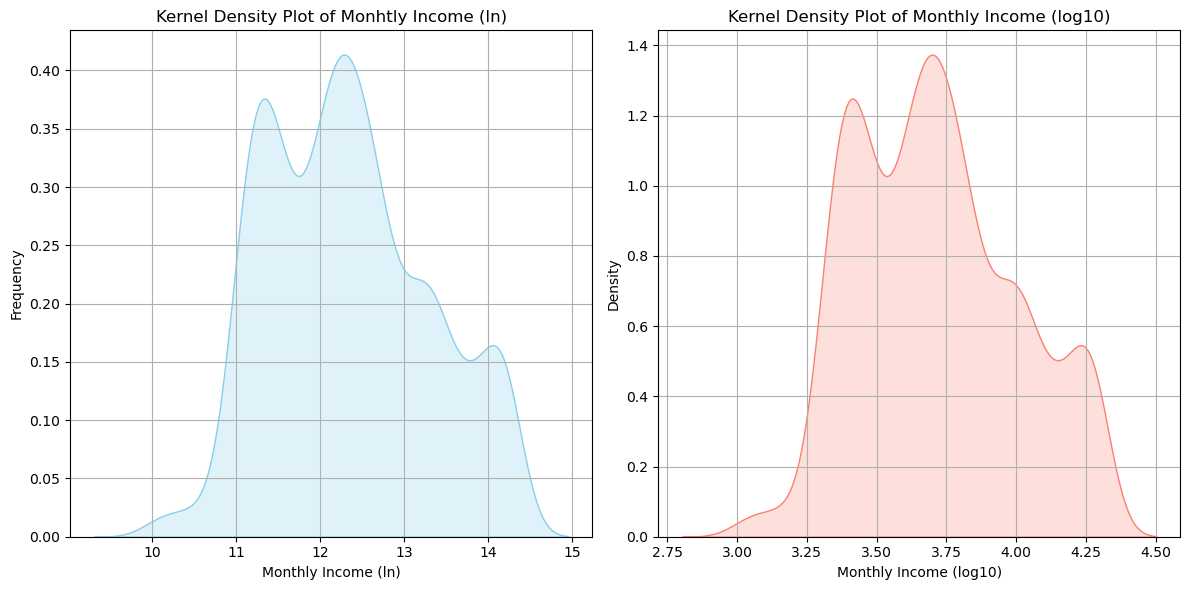

skewness ln transform: 0.28590017687202224
skewness log10 transform: 0.28590017687202623
kurtosis ln transform: -0.6992345608270574
kurtosis log10 transform: -0.6992345608270534


In [17]:
#INSTRUCTION: plot the kernel density plot of the log and ln transformed variable

# Set the figure size for the plots
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.kdeplot(df['MonthlyIncome_log2'], fill=True, color='skyblue')
plt.title('Kernel Density Plot of Monhtly Income (ln)')
plt.xlabel('Monthly Income (ln)')
plt.ylabel('Frequency')
plt.grid(True)

# Kernel Density Plot
plt.subplot(1, 2, 2)
sns.kdeplot(df['MonthlyIncome_log10'], fill=True, color='salmon')
plt.title('Kernel Density Plot of Monthly Income (log10)')
plt.xlabel('Monthly Income (log10)')
plt.ylabel('Density')
plt.grid(True)

plt.tight_layout()
plt.show()


# Calculate the skewness 
print('skewness ln transform:', str(skew(df.MonthlyIncome_log2, axis=0, bias=True)))
print('skewness log10 transform:', str(skew(df.MonthlyIncome_log10, axis=0, bias=True)))
# Calculate the kurtosis 
print('kurtosis ln transform:', str(kurtosis(df.MonthlyIncome_log2, axis=0, bias=True)))
print('kurtosis log10 transform:', str(kurtosis(df.MonthlyIncome_log10, axis=0, bias=True)))

The ln transformation is slightly more normal distributed than the log10 transformation.

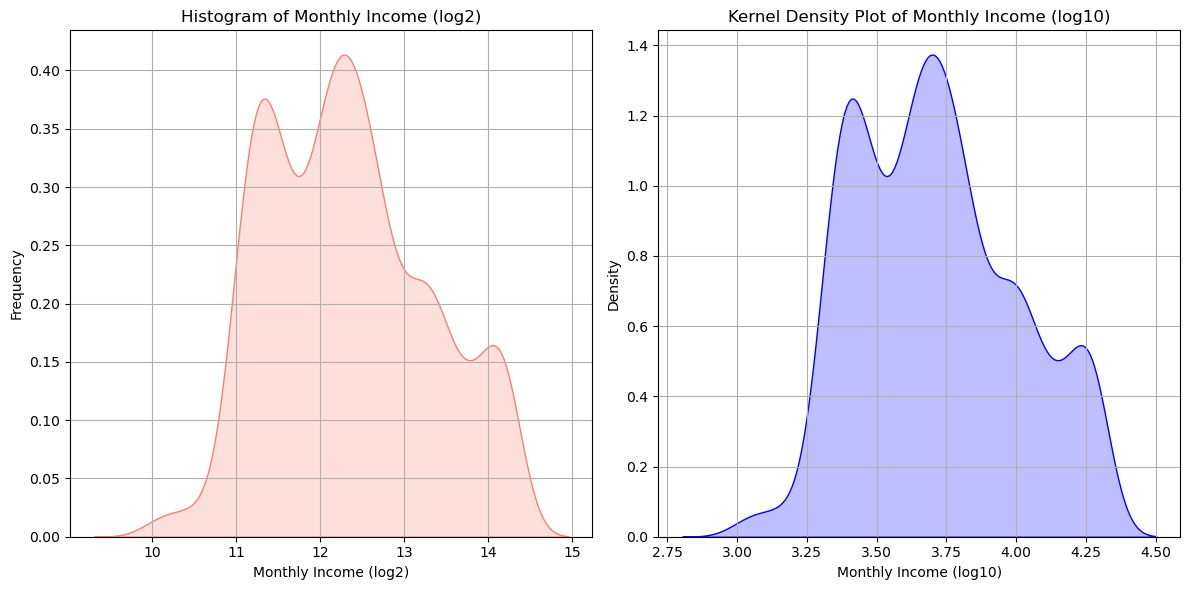

In [18]:
# Set the figure size for the plots
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.kdeplot(np.log2(df['MonthlyIncome']), fill=True, color='salmon')
plt.title('Histogram of Monthly Income (log2)')
plt.xlabel('Monthly Income (log2)')
plt.ylabel('Frequency')
plt.grid(True)

# Kernel Density Plot
plt.subplot(1, 2, 2)
sns.kdeplot(np.log10(df['MonthlyIncome']), fill=True, color='blue')
plt.title('Kernel Density Plot of Monthly Income (log10)')
plt.xlabel('Monthly Income (log10)')
plt.ylabel('Density')
plt.grid(True)

plt.tight_layout()
plt.show()

### XXX Correlations

#### Scatter plots

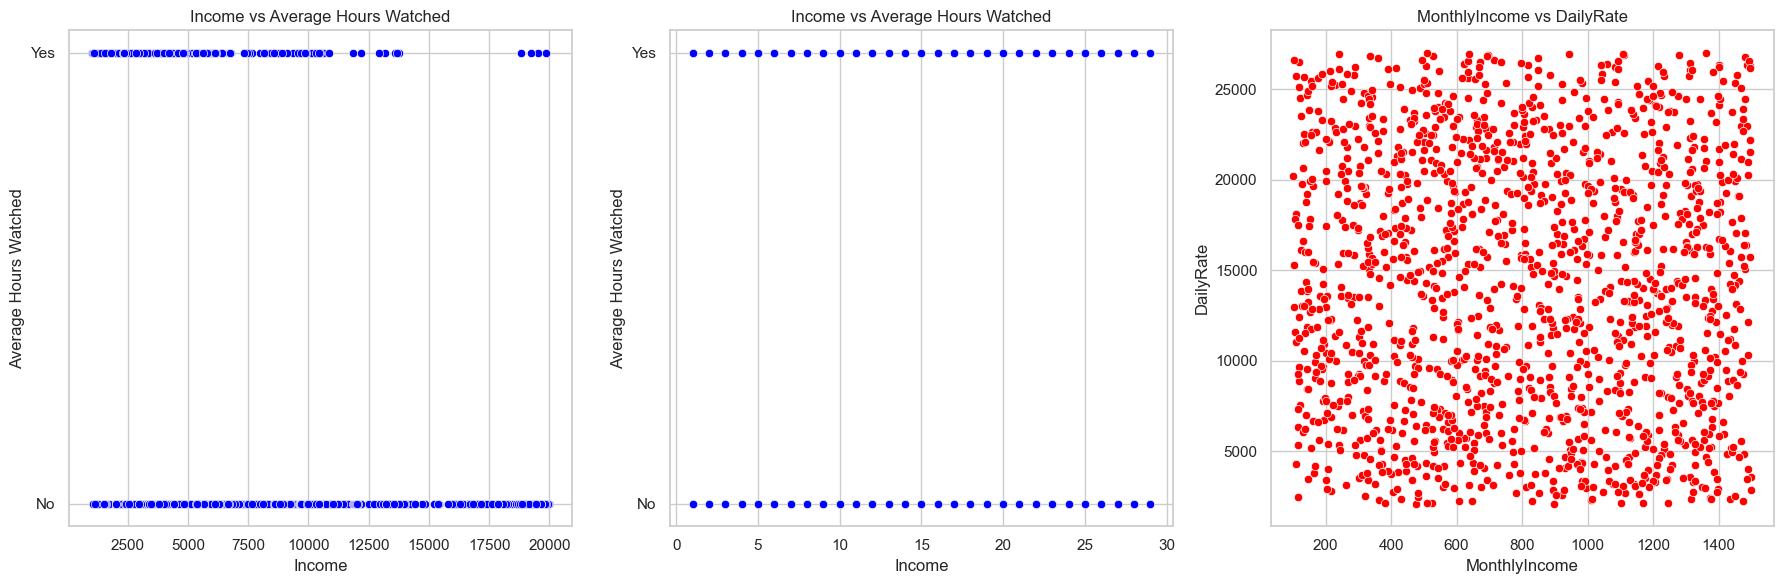

In [29]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure and axis objects
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot of Income vs Average Hours Watched
sns.scatterplot(x=df['MonthlyIncome'], y=df['Attrition'], ax=axes[0], color='blue')
axes[0].set_title('Income vs Average Hours Watched')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Average Hours Watched')

sns.scatterplot(x=df['DistanceFromHome'], y=df['Attrition'], ax=axes[1], color='blue')
axes[1].set_title('Income vs Average Hours Watched')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Average Hours Watched')

sns.scatterplot(x=df['DailyRate'], y=df['MonthlyRate'], ax=axes[2], color='red')
axes[2].set_title('MonthlyIncome vs DailyRate')
axes[2].set_xlabel('MonthlyIncome')
axes[2].set_ylabel('DailyRate')

# Display the plots
plt.tight_layout()
plt.show()



In [30]:
df[['MonthlyIncome', 'MonthlyRate', 'DailyRate']].cov()

,MonthlyIncome,MonthlyRate,DailyRate
MonthlyIncome,2.216486e+07,1.166613e+06,14641.125975
MonthlyRate,1.166613e+06,5.066288e+07,-92428.502266
DailyRate,1.464113e+04,-9.242850e+04,162819.593737


In [31]:
# Compute the Pearson correlation matrix
pearson_corr = df[['MonthlyIncome', 'MonthlyRate', 'DailyRate']].corr(method='pearson')

# Compute the Spearman correlation matrix
spearman_corr = df[['MonthlyIncome', 'MonthlyRate', 'DailyRate']].corr(method='spearman')

# Print the correlation matrices
print("Pearson Correlation Matrix:")
print(pearson_corr, "\n")

print("Spearman Correlation Matrix:")
print(spearman_corr)

Pearson Correlation Matrix:
               MonthlyIncome  MonthlyRate  DailyRate
MonthlyIncome       1.000000     0.034814   0.007707
MonthlyRate         0.034814     1.000000  -0.032182
DailyRate           0.007707    -0.032182   1.000000 

Spearman Correlation Matrix:
               MonthlyIncome  MonthlyRate  DailyRate
MonthlyIncome       1.000000     0.054277    0.01626
MonthlyRate         0.054277     1.000000   -0.03236
DailyRate           0.016260    -0.032360    1.00000


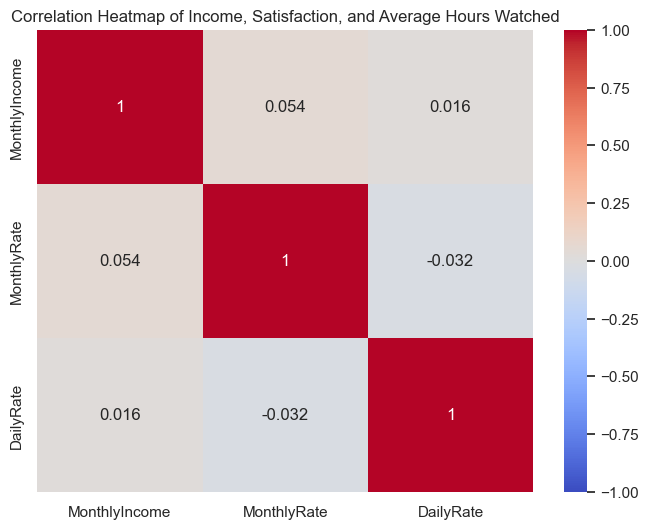

In [33]:
# Compute the Spearman correlation matrix
correlation_matrix = df[['MonthlyIncome', 'MonthlyRate', 'DailyRate']].corr(method='spearman') # use pearson for Pearson correlation

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

# Set the title and labels
plt.title('Correlation Heatmap of Income, Satisfaction, and Average Hours Watched')
plt.show()

In [40]:
data = df[[ 'DistanceFromHome', 'EnvironmentSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'DailyRate']]

# Calculate summary statistics
summary_stats = data.describe().T[['count', 'mean', 'std', 'min', 'max']]

# Calculate correlations with other variables
correlations = data.corr()

# Merge summary statistics and correlation information
summary_table = summary_stats.join(correlations, lsuffix='_stat')

# Rename the columns for clarity
summary_table.columns = [
    'N', 
    'Mean', 
    'S.D.', 
    'Min', 
    'Max', 
    '(1)', 
    '(2)', 
    '(3)', 
    '(4)', 
    ('(5)')
]

# rename row index
summary_table = summary_table.rename(index={'DistanceFromHome': "(1) Distance From Home", 'EnvironmentSatisfaction': "(2) Environment Satisfaction", 'MonthlyIncome': "(3) Monthly Income", 'MonthlyRate': "(4) Monthly Rate", 'DailyRate': "(5) Daily Rate"})

# Print the summary table
summary_table = np.round(summary_table,2)
summary_table


,N,Mean,S.D.,Min,Max,(1),(2),(3),(4),(5)
(1) Distance From Home,1470.0,9.19,8.11,1.0,29.0,1.00,-0.02,-0.02,0.03,-0.00
(2) Environment Satisfaction,1470.0,2.72,1.09,1.0,4.0,-0.02,1.00,-0.01,0.04,0.02
(3) Monthly Income,1470.0,6502.93,4707.96,1009.0,19999.0,-0.02,-0.01,1.00,0.03,0.01
(4) Monthly Rate,1470.0,14313.10,7117.79,2094.0,26999.0,0.03,0.04,0.03,1.00,-0.03
(5) Daily Rate,1470.0,802.49,403.51,102.0,1499.0,-0.00,0.02,0.01,-0.03,1.00


# 4. Method 1 

In this code we do some basic exploratory analysis to get an overview of the data set. Firstly, we assess the data set to ensure we identified interesting variables. Next we checked for duplicates and missing values but could not find any. For text entries we used "Unknwon" and for numeric we used 0. Lastly, we have decided to drop columns that are not adding value in example "EmployeeCount", "StandardHours", "Over18". The entries in these columns are all the same and therefore do not add much value. 

In [20]:
# Importing the data set, I used trial and error for the encoding. 
df= pd.read_csv("HR-Employee-Attrition.csv", encoding="latin1")

# 1. Load the data
df = pd.read_csv("HR-Employee-Attrition.csv")

# 2. Peek at the top and structure
print(df.head())      # first 5 rows
print(df.info())      # column types & non-null counts

# 3. Drop any exact duplicate rows
df.drop_duplicates(inplace=True)
print("After dropping duplicates:", df.shape)

# 4. Check for missing values
print("Missing per column:\n", df.isnull().sum())

# 5. Fill missing values
#    - For text (object) columns → “Unknown”
#    - For numeric columns → 0
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna("Unknown", inplace=True)
    else:
        df[col].fillna(0, inplace=True)

# 6. Drop columns that won’t vary and aren’t informative
to_drop = ["EmployeeCount", "StandardHours", "Over18"]
for c in to_drop:
    if c in df.columns:
        df.drop(columns=c, inplace=True)

# 8. Re-inspect to confirm
print(df.head())
print(df.info())



   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  

In [21]:
# Simply checking the scale of the numeric columns 
cols_to_check = [
    'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
    'HourlyRate', 'JobInvolvement', 'JobLevel',
    'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance'
]

# Loop through each column and print min and max
for col in cols_to_check:
    min_val = df[col].min()
    max_val = df[col].max()
    print(f"{col}: Min = {min_val}, Max = {max_val}")


DistanceFromHome: Min = 1, Max = 29
Education: Min = 1, Max = 5
EnvironmentSatisfaction: Min = 1, Max = 4
HourlyRate: Min = 30, Max = 100
JobInvolvement: Min = 1, Max = 4
JobLevel: Min = 1, Max = 5
JobSatisfaction: Min = 1, Max = 4
RelationshipSatisfaction: Min = 1, Max = 4
WorkLifeBalance: Min = 1, Max = 4


In [22]:
# Detect outliers using the IQR method for numerical columns, this is not really necessary because our variable are nominal and therefore do not have outliers.
numeric_cols = df.select_dtypes(include='number').columns
outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = outliers.shape[0]

print("Outlier counts per column:")
print(outlier_summary)

# Check for irregularities in categorical columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].value_counts(dropna=False))

Outlier counts per column:
{'Age': 0, 'DailyRate': 0, 'DistanceFromHome': 0, 'Education': 0, 'EmployeeNumber': 0, 'EnvironmentSatisfaction': 0, 'HourlyRate': 0, 'JobInvolvement': 0, 'JobLevel': 0, 'JobSatisfaction': 0, 'MonthlyIncome': 114, 'MonthlyRate': 0, 'NumCompaniesWorked': 52, 'PercentSalaryHike': 0, 'PerformanceRating': 226, 'RelationshipSatisfaction': 0, 'StockOptionLevel': 85, 'TotalWorkingYears': 63, 'TrainingTimesLastYear': 238, 'WorkLifeBalance': 0, 'YearsAtCompany': 104, 'YearsInCurrentRole': 21, 'YearsSinceLastPromotion': 107, 'YearsWithCurrManager': 14}

Unique values in 'Attrition':
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Unique values in 'BusinessTravel':
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Unique values in 'Department':
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

Unique values in '

H1. There is no difference in levels of attrition among low-travelers and high travelers.

In [23]:

from scipy.stats import chi2_contingency

# 1. Build the contingency table
contingency_table = pd.crosstab(
    df['Attrition'],
    df['BusinessTravel']
)

# 2. Run the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 3. Output the results
print("Contingency Table:")
print(contingency_table)

print(f"\nChi2 Statistic: {chi2:.4f}")
print(f"P-Value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

print("\nExpected Frequencies:")
print(pd.DataFrame(
    expected,
    index=contingency_table.index,
    columns=contingency_table.columns
))

Contingency Table:
BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
No                     138                208            887
Yes                     12                 69            156

Chi2 Statistic: 24.1824
P-Value: 0.0000
Degrees of Freedom: 2

Expected Frequencies:
BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
No              125.816327         232.340816     874.842857
Yes              24.183673          44.659184     168.157143


This implies that attrition and travel frequency are not unrelated. The contigency table shows that far fewer travelers choose to leave the company than if the observations were independent. And far more frequent travelers choose to leave the company. 

In [24]:
# 1. Define low- and high-travel groups
low_travel = df['BusinessTravel'].isin(['Non-Travel', 'Travel_Rarely'])
high_travel = df['BusinessTravel'] == 'Travel_Frequently'

# 2. Count attriters in each group
count_low  = df.loc[low_travel,  'Attrition'].eq('Yes').sum()
nobs_low   = low_travel.sum()

count_high = df.loc[high_travel, 'Attrition'].eq('Yes').sum()
nobs_high  = high_travel.sum()

# 3. Perform two-proportions z-test (one-sided: low < high)
stat, pval = proportions_ztest(
    count  = [count_low, count_high],
    nobs    = [nobs_low,   nobs_high],
    alternative = 'smaller'
)

print(f"Low-travel attrition rate:  {count_low}/{nobs_low:.0f} = {count_low/nobs_low:.3f}")
print(f"High-travel attrition rate: {count_high}/{nobs_high:.0f} = {count_high/nobs_high:.3f}")
print(f"\nZ-statistic = {stat:.3f},  one-sided p-value = {pval:.4f}")


Low-travel attrition rate:  168/1193 = 0.141
High-travel attrition rate: 69/277 = 0.249

Z-statistic = -4.415,  one-sided p-value = 0.0000


Looking at the low p-value there is significant evidence that the high travel attrition rate is significantly higher than the low travel attrition rate. 

# 5. Method 2 

## 5.1 Creating the model

In [25]:
print(summary_df)


                    Variable    Type
0                        Age   int64
1                  Attrition  object
2             BusinessTravel  object
3                  DailyRate   int64
4                 Department  object
5           DistanceFromHome   int64
6                  Education   int64
7             EducationField  object
8              EmployeeCount   int64
9             EmployeeNumber   int64
10   EnvironmentSatisfaction   int64
11                    Gender  object
12                HourlyRate   int64
13            JobInvolvement   int64
14                  JobLevel   int64
15                   JobRole  object
16           JobSatisfaction   int64
17             MaritalStatus  object
18             MonthlyIncome   int64
19               MonthlyRate   int64
20        NumCompaniesWorked   int64
21                    Over18  object
22                  OverTime  object
23         PercentSalaryHike   int64
24         PerformanceRating   int64
25  RelationshipSatisfaction   int64
2

In [26]:
# Encode Attrition as 0/1
df['attrit_bin'] = df['Attrition'].map({'No': 0, 'Yes': 1})

# Fit logistic regression

model = smf.logit('attrit_bin ~ BusinessTravel + MaritalStatus + MonthlyIncome + DistanceFromHome + WorkLifeBalance + PerformanceRating + JobSatisfaction + EnvironmentSatisfaction', data=df).fit()
print(model.summary())



Optimization terminated successfully.
         Current function value: 0.387370
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             attrit_bin   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1459
Method:                           MLE   Df Model:                           10
Date:                Sun, 28 Sep 2025   Pseudo R-squ.:                  0.1230
Time:                        16:43:08   Log-Likelihood:                -569.43
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 3.712e-29
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.2907      0.852 

## 5.2 Interpreting the outcome 


### 5.2.1 Goodness-of-fit

### 5.2.2 Hypothesis testing

### 5.2.3 Odds ratio

In [27]:
mcfadden_r2 = 1 - (model.llf / model.llnull)
print(f"McFadden's pseudo R-squared: {mcfadden_r2}")

#Cox & Snell R-Squared
n = len(df)  # number of observations
cox_snell_r2 = 1 - np.exp((model.llnull - model.llf) * 2 / n)
print(f"Cox & Snell pseudo R-squared: {cox_snell_r2}")

# Nagelkerke R-Squared
nagelkerke_r2 = cox_snell_r2 / (1 - np.exp(-model.llnull * 2 / n))
print(f"Nagelkerke pseudo R-squared: {nagelkerke_r2}")

McFadden's pseudo R-squared: 0.12299102823758878
Cox & Snell pseudo R-squared: 0.10295476977622797
Nagelkerke pseudo R-squared: -0.07255008025989275


#### Interpretation

We can argue that the model is not very useful for predictions due to the the low R-squared values. It can still be used for hypothesis testing. 

# 6. Reflection on the use of AI

We primarily used AI to help us solving issues. Our main contribution was finding the problems that require a solution. (...)

# 7. Conclusion